# Linear Regression

## 1. The `cars` dataset

In this notebook, I will show you how to implement linear regression in `R`. We will be using the `cars` dataset, which has two variables: `speed` (the speed of the car in mph) and `dist` (its stopping distance in ft). There is no need to load the data, as it is already comes in with `R`. Calling `cars` would output a dataframe. In this notebook, we will regress `dist` on `speed`, because it makes sense that the stopping distance of a car depends on its speed and not the other way around. 

## 2. Training and Testing Sets

As with any other machine learning practice, we first split the data into a training set and a testing set. For this demonstration, we remove 10% of the data randomly and make that as our test set.

In [6]:
# sample size for test set
test_size = floor(0.10 * nrow(cars))

set.seed(50)
test_ind <- sample(seq_len(nrow(cars)), size = test_size)

train <- cars[-test_ind,]
test <- cars[test_ind,]

## 2. Exploratory Data Analysis
It is best practice to look at the data first before performing any analysis on it. So we first plot the (training) data.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



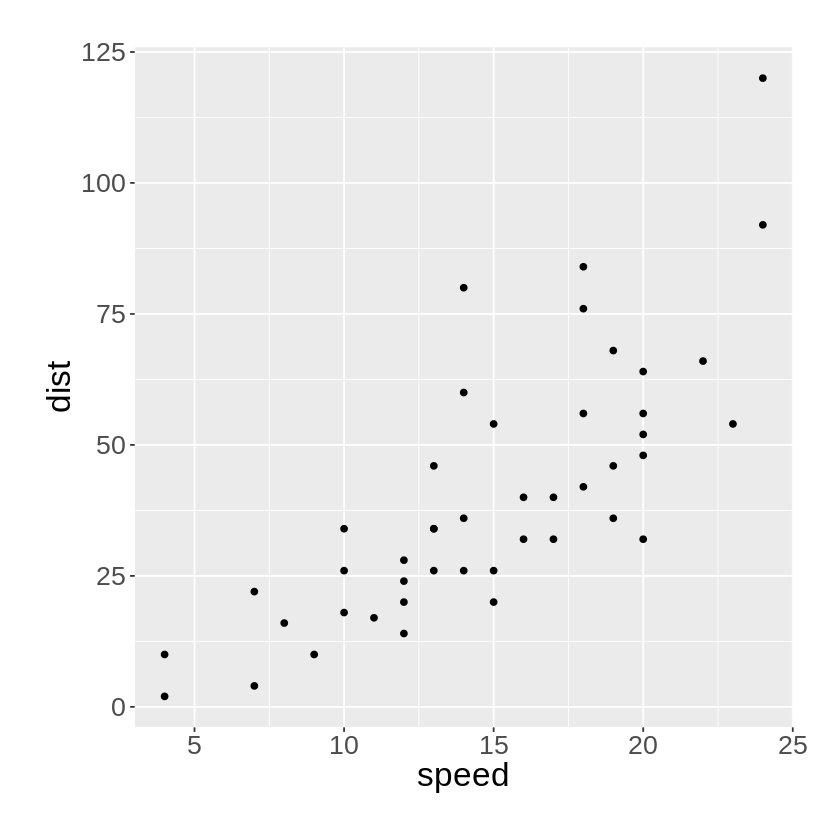

In [7]:
# install qqplot extensions
install.packages("qqplotr")

library(ggplot2)  # plotting library
library(qqplotr)  # qqplot extensions for ggplot

# scatterplot
ggplot(train, aes(x=speed, y=dist)) + geom_point() + 
      theme(text = element_text(size=20)) + 
      theme(plot.margin = unit(c(1,1,1,1), "cm"))

So, based from the graph, it can be possible that there is a linear trend between `speed` and `dist`. Moreover, it seems like there is an outlier, whose `dist` value is roughly equal to 125. Since we do not have enough background knowledge on cars, we will just leave the outlier in the data. 

## Regression Analysis

Performing regression on the `cars` dataset could not be any simpler on `R`. It can be done using the `lm` command. In this case, we type `model <- lm(dist~speed, data=cars)`. Then, typing `summary(model)` should give us a quick summary of the regression analysis.

In [8]:
# fit a linear model
model <- lm(dist ~ speed, data=train)
summary(model)


Call:
lm(formula = dist ~ speed, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.127 -10.306  -3.914  11.013  44.588 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.2986     7.5706  -2.153    0.037 *  
speed         3.8213     0.4833   7.906 6.44e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.99 on 43 degrees of freedom
Multiple R-squared:  0.5925,	Adjusted R-squared:  0.583 
F-statistic: 62.51 on 1 and 43 DF,  p-value: 6.437e-10


## Confidence Intervals

Clearly, the best estimates for the parameters are $\widehat{\beta}_0 = -16.2896$ and $\widehat{\beta}_1 = 3.8213$. For the confidence intervals of these parameters, we can use the `confint` command.

In [9]:
confint(model, level=0.95)

,2.5 %,97.5 %
(Intercept),-31.566215,-1.030977
speed,2.846575,4.795986


Thus we see that the 95% confidence interval for $\beta_0$ is $(-31.5662, -1.0310)$ and for $\beta_1$, its $(2.8466, 4.7960)$. 


## Hypothesis Testing

We also could test whether the parameters are significant. We can try and test whether the slope coefficient is significant by testing the hypotheses:

$$
\begin{align*}
&H_0: \beta_1 = 0 \\
&H_{\text{a}}: \beta_1 \ne 0\;.
\end{align*}
$$

If you're performing the test at say 95\% confidence, you simply have to look at the `Pr(>|t|)` column in the summary (also known as the $p$-value). For the slope, the $p$-value for the speed is $6.44 \times 10^{-10}$, which is way smaller than the significance level $0.05$. Thus, we reject the null hypothesis and conclude that the slope coefficient is nonzero at 95\% confidence.


## Diagnostic Plots

Now linear regression comes with four assumptions: normality, independence, heteroscedasticity, and linearity.

The *linearity assumption* tells us that the dependent variable is lienarly related to the parameters, and from the plot earlier, we see that this assumption could be possible.

The *normality assumption* on the other hand, tells us that the dependent variable $Y$ can be described as

$$
Y = \widehat{\beta}_0 + \widehat{\beta}_1x_1 + \ldots
+ \widehat{\beta}_nx_n +\varepsilon 
$$

where $\varepsilon$ is a random variable normally distributed with mean $0$ and variance $\sigma^2$. The short-hand notation for this is $\varepsilon \sim \mathcal{N}(0, \sigma^2)$. 

Since we don't exactly know the values of the residuals $\varepsilon$, we can use an estimate instead. A suitable estimator is the residual $\widehat{\varepsilon}$, where

$$
\widehat{\varepsilon} = y - \widehat{y},
$$

with $y$ being the true value, and $\widehat{y}$ being the predicted value. To test whether the error is normally distributed, we have to plot the residuals in a probability plot shown below.

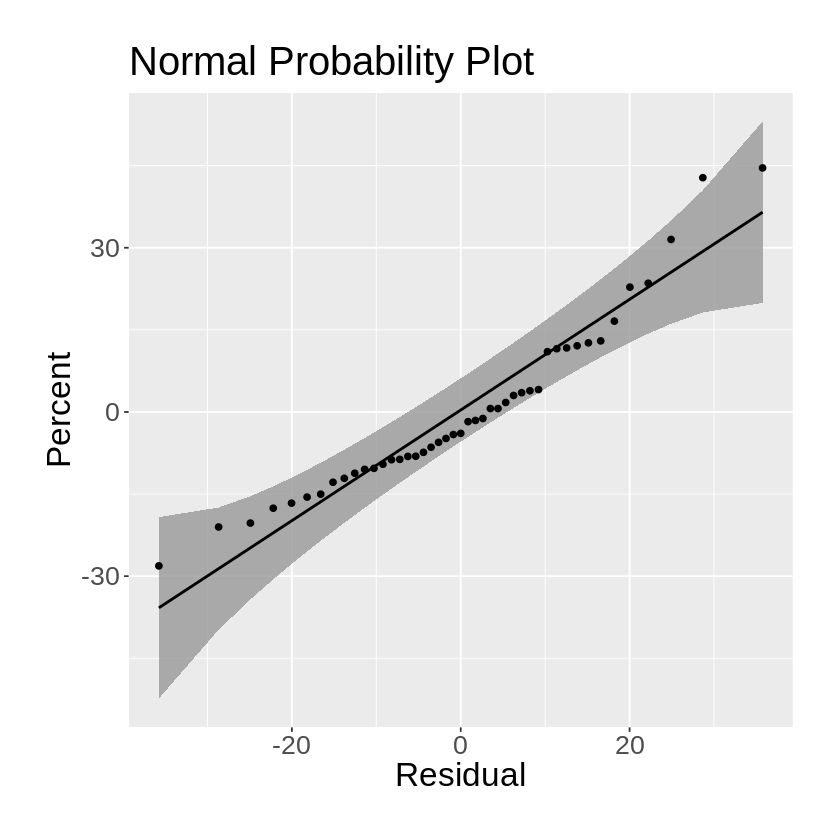

In [10]:
ggplot(mapping = aes(sample = model$residuals)) + 
           stat_qq_band() + 
           stat_qq_line() + 
           stat_qq_point() +
           ggtitle("Normal Probability Plot") +
           xlab("Residual") +
           ylab("Percent") +
           theme(text = element_text(size=20)) + 
           theme(plot.margin = unit(c(1,1,1,1), "cm"))

The idea of a normal probability plot is that if the residuals follow the line closely, then we can safely assume that the error is normally distributed. If you want to be more rigorous, then if the residuals lie inside the 95% confidence band (shaded in gray), we can safely assume that the residuals are normally distributed. 

In the plot above, we see that one residual is outside the confidence band, but the rest are inside, so we can safely assume that $\varepsilon$ is normally distributed.

> ## Caution
  The quantile-quantile plot is certainly subject to interpretation. While we did assume that the distribution is normal, others could argue that its not as the residuals curve upward, indicating that the distribution is right-skewed and not normal. (Normal distributions are symmetric and not skewed.) 


Now to check *heteroscedasticity assumption* means that we should check whether the variance $\sigma^2$ is fixed. Recall that this variance appears in the distribution of $\varepsilon$, where $\varepsilon \sim \mathcal{N}(0,\sigma^2)$.